#Imports and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import sklearn.decomposition

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:1000,:]
sub_labels = train_labels[:1000]



In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

k=180 #ran with 187 before, now 160
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

G0 = Y_train[train_labels==0,:]
G1 = Y_train[train_labels==1,:]
G2 = Y_train[train_labels==2,:]
G3 = Y_train[train_labels==3,:]
G4 = Y_train[train_labels==4,:]
G5 = Y_train[train_labels==5,:]
G6 = Y_train[train_labels==6,:]
G7 = Y_train[train_labels==7,:]
G8 = Y_train[train_labels==8,:]
G9 = Y_train[train_labels==9,:]

#2

In [ ]:
#let k=1
#find dist from k to all train points
#find clostsest 1 from each group
#find centroid
#find dist from k to each centroid
#find smallest distance
#arg min to find prediction

#k=2 
#find next closest
#find centroid
#find dist from test point to each centroid
#find smallest distance
#arg min to find prediction
#... repeat for k 3:12

#
#compute all dists
#find top 12 closest indices


#
pred_mat = np.zeros([10000,12]) #columns are k=1...12

for r in range(Y_test.shape[0]): 


    G0_dists, G1_dists, G2_dists, G3_dists, G4_dists = [],[],[],[],[] 
    G5_dists, G6_dists, G7_dists, G8_dists, G9_dists = [],[],[],[],[]
    closest_img_index_G0, closest_img_index_G1, closest_img_index_G2 = [],[],[]
    closest_img_index_G3, closest_img_index_G4, closest_img_index_G5= [],[],[]
    closest_img_index_G6, closest_img_index_G7, closest_img_index_G8  = [],[],[]
    closest_img_index_G9 = []

    test_point = Y_test[r,:]

    #finds all distances, only run once
    for i in range(G0.shape[0]):
        G0_dists.append( np.sqrt(np.sum((  test_point - G0[i,:]  )**2)) )
        G1_dists.append( np.sqrt(np.sum((  test_point - G1[i,:]  )**2)) )
        G2_dists.append( np.sqrt(np.sum((  test_point - G2[i,:]  )**2)) )
        G3_dists.append( np.sqrt(np.sum((  test_point - G3[i,:]  )**2)) )
        G4_dists.append( np.sqrt(np.sum((  test_point - G4[i,:]  )**2)) )
        G5_dists.append( np.sqrt(np.sum((  test_point - G5[i,:]  )**2)) )
        G6_dists.append( np.sqrt(np.sum((  test_point - G6[i,:]  )**2)) )
        G7_dists.append( np.sqrt(np.sum((  test_point - G7[i,:]  )**2)) )
        G8_dists.append( np.sqrt(np.sum((  test_point - G8[i,:]  )**2)) )
        G9_dists.append( np.sqrt(np.sum((  test_point - G9[i,:]  )**2)) )

    for k in range(12):
        i0=np.argmin(G0_dists)
        i1=np.argmin(G1_dists)
        i2=np.argmin(G2_dists)
        i3=np.argmin(G3_dists)
        i4=np.argmin(G4_dists)
        i5=np.argmin(G5_dists)
        i6=np.argmin(G6_dists)
        i7=np.argmin(G7_dists)
        i8=np.argmin(G8_dists)
        i9=np.argmin(G9_dists)
        closest_img_index_G0.append(i0)
        closest_img_index_G1.append(i1)
        closest_img_index_G2.append(i2)
        closest_img_index_G3.append(i3)
        closest_img_index_G4.append(i4)
        closest_img_index_G5.append(i5)
        closest_img_index_G6.append(i6)
        closest_img_index_G7.append(i7)
        closest_img_index_G8.append(i8)
        closest_img_index_G9.append(i9)
        G0_dists[i0] = np.Inf
        G1_dists[i1] = np.Inf
        G2_dists[i2] = np.Inf
        G3_dists[i3] = np.Inf
        G4_dists[i4] = np.Inf
        G5_dists[i5] = np.Inf
        G6_dists[i6] = np.Inf
        G7_dists[i7] = np.Inf
        G8_dists[i8] = np.Inf
        G9_dists[i9] = np.Inf
        c0 = np.mean(G0[closest_img_index_G0,:],axis=0)
        c1 = np.mean(G1[closest_img_index_G1,:],axis=0)
        c2 = np.mean(G2[closest_img_index_G2,:],axis=0)
        c3 = np.mean(G3[closest_img_index_G3,:],axis=0)
        c4 = np.mean(G4[closest_img_index_G4,:],axis=0)
        c5 = np.mean(G5[closest_img_index_G5,:],axis=0)
        c6 = np.mean(G6[closest_img_index_G6,:],axis=0)
        c7 = np.mean(G7[closest_img_index_G7,:],axis=0)
        c8 = np.mean(G8[closest_img_index_G8,:],axis=0)
        c9 = np.mean(G9[closest_img_index_G9,:],axis=0)

        test_to_centroids_dists = []
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c0)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c1)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c2)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c3)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c4)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c5)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c6)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c7)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c8)**2) ) )
        test_to_centroids_dists.append(np.sqrt( np.sum( (test_point - c9)**2) ) )

        #find pred
        pred=np.argmin(test_to_centroids_dists)
        pred_mat[r,k] = pred

#print(pred_mat)

In [ ]:
for i in range(12):
    score=accuracy_score(y_true=test_labels, y_pred=pred_mat[:,i])
    print('k', i+1, '\nscore:', score)    


Text(0, 0.5, 'Percent Error')

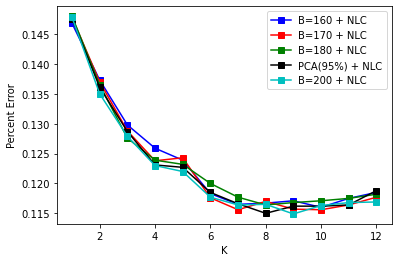

In [ ]:
acc_160 = [0.8532,0.8627,0.8702,0.8741,0.8761,0.8817,
           0.8835,0.8833,0.8829,0.884,0.8825,0.8815]
acc_170 = [0.8522, 0.863, 0.8712, 0.8762, 0.8757, 0.8824,
           0.8844, 0.883, 0.8843, 0.8844, 0.8836, 0.8823]
acc_180 = [0.852 , 0.8635, 0.8724, 0.8761,0.8768, 0.88,
           0.8823, 0.8836, 0.8832, 0.8829,0.8825,0.8818]
acc_187 = [0.8524,0.8639,0.8713,0.8769,0.8773,0.8815,
           0.8834,0.885,0.8838,0.8838,0.8836,0.8812]
acc_200 = [0.8522,0.865,0.8721,0.877,0.878,0.8823,
           0.8836,0.8835,0.8851,0.8837,0.8832,0.8831]

error_160 = 1-np.array(acc_160)
error_170 = 1-np.array(acc_170)
error_180 = 1-np.array(acc_180)
error_187 = 1-np.array(acc_187)
error_200 = 1-np.array(acc_200)

#plots
plt.plot(range(1,13), error_160, '-bs', label='B=160 + NLC')
plt.plot(range(1,13), error_170, '-rs', label='B=170 + NLC')
plt.plot(range(1,13), error_180, '-gs', label='B=180 + NLC')
plt.plot(range(1,13), error_187, '-ks', label='PCA(95%) + NLC')
plt.plot(range(1,13), error_200, '-cs', label='B=200 + NLC')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')